In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import pandas as pd
my_cols = ["study_subject", "jitter_in_%", "absolute_jitter_in_microseconds", "rap", "ppq5", "ddp", "shimmer_in_%", "absolute_shimmer_in_db", "apq3", "apq5", "apq11", "dda", "Autocorrelation_between_NHR_and_HNR", "NHR", "HNR", "Median_pitch", "Mean_pitch", "Standard_Deviation_of_pitch", "Minimum_pitch", "Maximum_pitch", "Number_of_pulses", "Number_of_periods", "Mean_period", "Standard_deviation_of_period", "Fraction_of_unvoiced_frames", "Number_of_voice_breaks", "Degree_of_voice_breaks", "UPDRS", "PD"]
data = pd.read_csv("/content/drive/My Drive/datascience/po1_data.txt", names=my_cols, engine='python')

In [75]:
print(data.head())

   study_subject  jitter_in_%  absolute_jitter_in_microseconds    rap   ppq5  \
0              1        1.488                         0.000090  0.900  0.794   
1              1        0.728                         0.000038  0.353  0.376   
2              1        1.220                         0.000074  0.732  0.670   
3              1        2.502                         0.000123  1.156  1.634   
4              1        3.509                         0.000167  1.715  1.539   

     ddp  shimmer_in_%  absolute_shimmer_in_db   apq3   apq5  ...  \
0  2.699         8.334                   0.779  4.517  4.609  ...   
1  1.059         5.864                   0.642  2.058  3.180  ...   
2  2.196         8.719                   0.875  4.347  5.166  ...   
3  3.469        13.513                   1.273  5.263  8.771  ...   
4  5.145         9.112                   1.040  3.102  4.927  ...   

   Maximum_pitch  Number_of_pulses  Number_of_periods  Mean_period  \
0        187.576               160

In [76]:
print(data.isnull().sum())

study_subject                          0
jitter_in_%                            0
absolute_jitter_in_microseconds        0
rap                                    0
ppq5                                   0
ddp                                    0
shimmer_in_%                           0
absolute_shimmer_in_db                 0
apq3                                   0
apq5                                   0
apq11                                  0
dda                                    0
Autocorrelation_between_NHR_and_HNR    0
NHR                                    0
HNR                                    0
Median_pitch                           0
Mean_pitch                             0
Standard_Deviation_of_pitch            0
Minimum_pitch                          0
Maximum_pitch                          0
Number_of_pulses                       0
Number_of_periods                      0
Mean_period                            0
Standard_deviation_of_period           0
Fraction_of_unvo

In [77]:
data = data.drop_duplicates()

In [78]:
healthy_data = data[data['PD'] == 0]
pd_data = data[data['PD'] == 1]

In [79]:
import pandas as pd
from scipy.stats import ttest_ind
p_values = []
for column in data.columns[1:]:
    healthy_values = healthy_data[column]
    pd_values = pd_data[column]
    t_statistic, p_value = ttest_ind(healthy_values, pd_values)
    p_values.append(p_value)

median_p_value = pd.Series(p_values).median()
iqr_p_value = pd.Series(p_values).quantile(0.75) - pd.Series(p_values).quantile(0.25)


threshold = median_p_value + 1.5 * iqr_p_value

print("Median p-value:", median_p_value)
print("IQR of p-values:", iqr_p_value)
print("Threshold value:", threshold)

Median p-value: 0.007457120081460562
IQR of p-values: 0.1431738393235625
Threshold value: 0.22221787906680432


<ipython-input-79-fca06e76bd7d>:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = ttest_ind(healthy_values, pd_values)


In [82]:

significant_features = []
significant_features_p_value = []

for column in data.columns[1:]:
    healthy_values = healthy_data[column]
    pd_values = pd_data[column]


    t_statistic, p_value = ttest_ind(healthy_values, pd_values)


    if p_value < threshold:
        significant_features.append(column)
        significant_features_p_value.append(p_value)


print("Statistically significant features:", significant_features)
len(significant_features)
print("Statistically significant features:", significant_features_p_value)


Statistically significant features: ['jitter_in_%', 'absolute_jitter_in_microseconds', 'rap', 'ppq5', 'ddp', 'apq11', 'Autocorrelation_between_NHR_and_HNR', 'NHR', 'HNR', 'Median_pitch', 'Mean_pitch', 'Standard_Deviation_of_pitch', 'Minimum_pitch', 'Maximum_pitch', 'Number_of_pulses', 'Number_of_periods', 'Mean_period', 'Standard_deviation_of_period', 'Fraction_of_unvoiced_frames', 'Number_of_voice_breaks', 'Degree_of_voice_breaks', 'UPDRS', 'PD']
Statistically significant features: [0.0016344496445435067, 6.055252751057853e-08, 0.0003292913407710949, 0.0003379936090640013, 0.00032952816569233555, 2.1507317386375703e-06, 0.008886608396824192, 0.014127255939245669, 0.191800442148244, 0.006574901469342033, 0.000852121912640331, 9.068988191270615e-05, 0.0567266528876866, 6.418899305637324e-06, 0.1860367130799258, 0.12900341386495734, 0.00833933869357909, 0.0580649704408664, 7.95277348097335e-05, 0.010009929669102151, 4.510173397436688e-05, 1.0259139698689208e-192, 0.0]


<ipython-input-82-35a080ae6c60>:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = ttest_ind(healthy_values, pd_values)


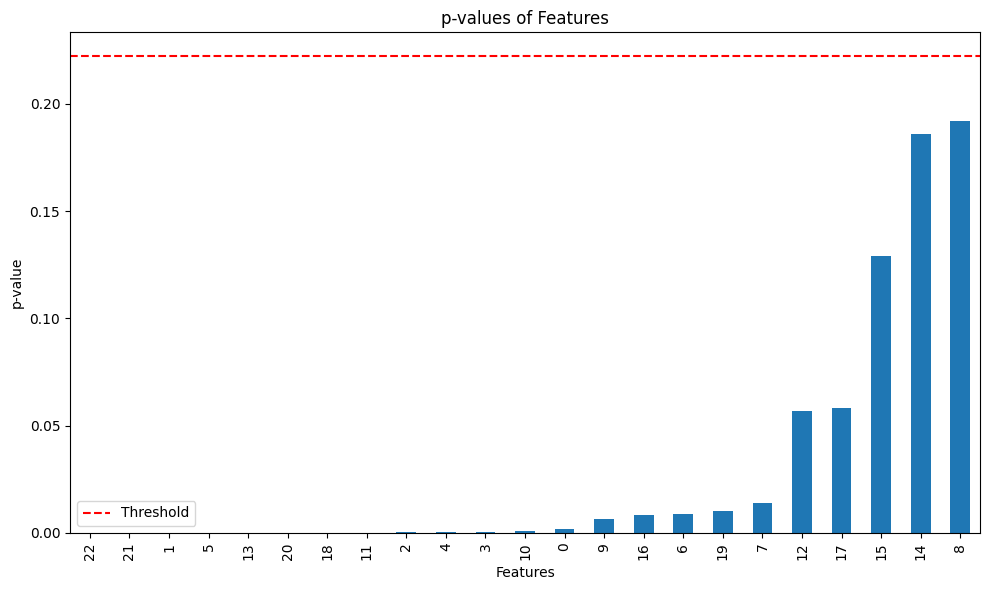

In [81]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))
p_values_series_sorted.plot(kind='bar')
plt.axhline(y=threshold, color='r', linestyle='dashed', label='Threshold')
plt.xlabel('Features')
plt.ylabel('p-value')
plt.title('p-values of Features')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()